https://weina.me/nested-cross-validation/

In [1]:
import os
import csv
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RndFC
from sklearn.model_selection import RandomizedSearchCV

In [3]:
"""
Created on Thu Sep  5 17:45:41 2019
@author: JosePablo
"""

import itertools
import matplotlib.pyplot as plt
import numpy as np

"""
Confusion matrix code taken from scikit-learn.org
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
"""
def plot_confusion_matrix(cm,classes,normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):plt.text(j,i,format(cm[i,j],fmt),
                                        horizontalalignment='center',
                                        color='white' if cm[i,j] > thresh else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [4]:
def createFolder(path):
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except:
        print("An error ocurred while creatig directory: "+ path)

In [5]:
def cleanLine(line, header = False):
    line = line.replace("'",'')
    line = line.replace("[",'')
    line = line.replace("]",'')
    if header:
        line = line.replace('\ ','')
    else:
        line = line.replace("?",'NaN')
    arr = line.split(',')
    return arr

**Hyperparameter tuning**
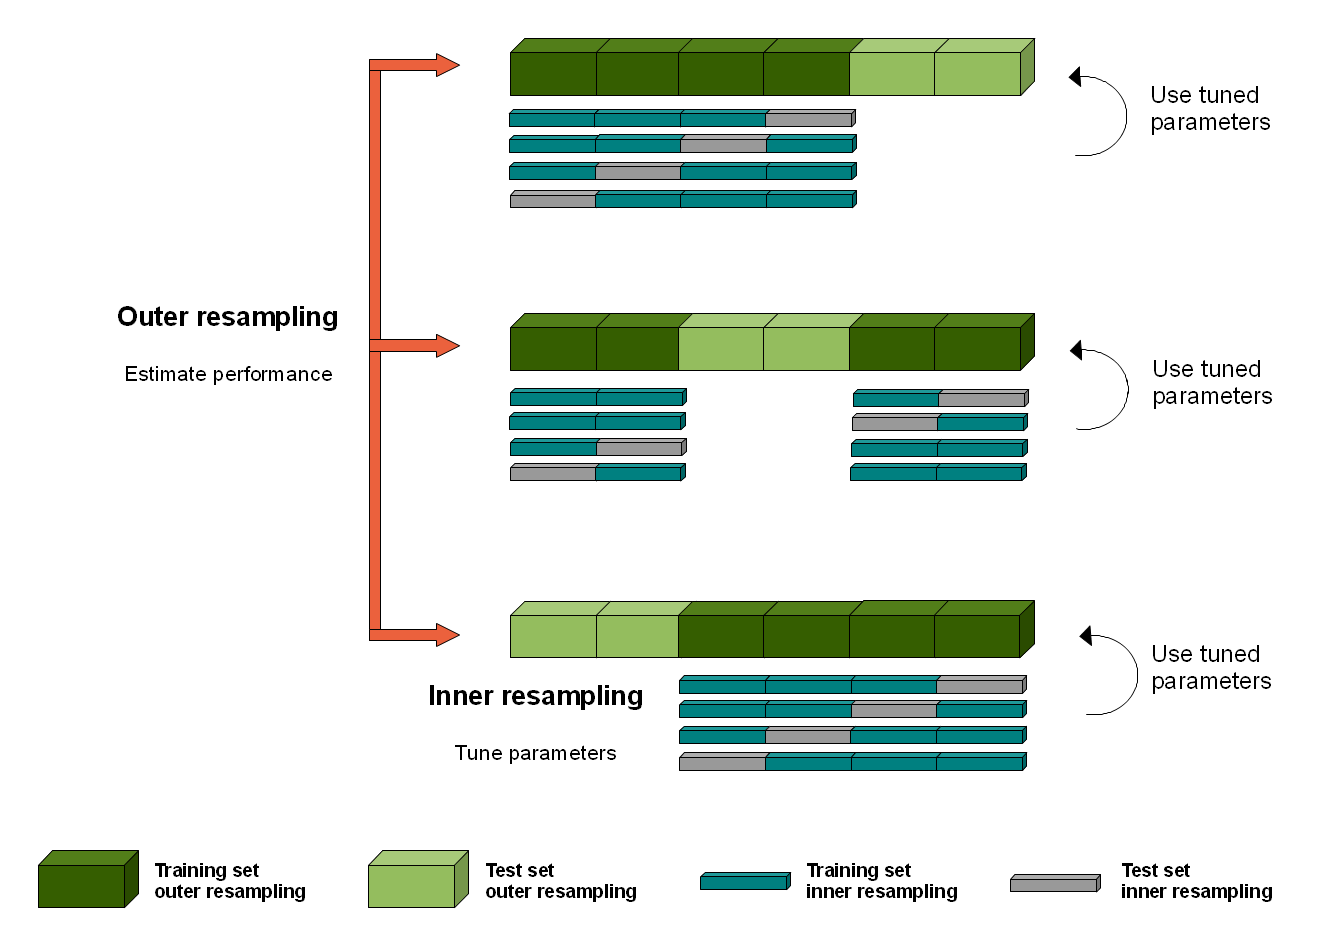

1. Split train and test dataset 10 Subjects
2. Create CVIterator_Array=[CVIterator1,.....,CVIterator10]
3. Tune Hyperparameters
4. Evaluate performance with best parameters on Test dataset

In [6]:
stuff =['Ankle','Belt','Neck','Wrist']
names=[]
for L in range(1, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        p=''
        for i in subset:
            p+=i
        names.append(p)
print(names)

['Ankle', 'Belt', 'Neck', 'Wrist', 'AnkleBelt', 'AnkleNeck', 'AnkleWrist', 'BeltNeck', 'BeltWrist', 'NeckWrist', 'AnkleBeltNeck', 'AnkleBeltWrist', 'AnkleNeckWrist', 'BeltNeckWrist', 'AnkleBeltNeckWrist']


In [7]:
stuff =['Глужд','Половина','Врат','Зглоб на рака']
ime=[]
for L in range(1, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        p=''
        for i in subset:
            p+=i
        ime.append(p)
print(ime)

['Глужд', 'Половина', 'Врат', 'Зглоб на рака', 'ГлуждПоловина', 'ГлуждВрат', 'ГлуждЗглоб на рака', 'ПоловинаВрат', 'ПоловинаЗглоб на рака', 'ВратЗглоб на рака', 'ГлуждПоловинаВрат', 'ГлуждПоловинаЗглоб на рака', 'ГлуждВратЗглоб на рака', 'ПоловинаВратЗглоб на рака', 'ГлуждПоловинаВратЗглоб на рака']


In [10]:
n_sub=[1,17]

for name in names:
    path="C:\\Users\\Korisnik\\Desktop\\diplomska\\Version4\\"+name+"\\Cross_Validation"
    for sub in range(n_sub[0],n_sub[1]+1):
        path1=path+'\\Leave_'+str(sub)
        createFolder(path1)
        f_row = 1
        f_flg = True
        index=0
        path_train=path1+'\\Train.csv'
        w_train=open(path_train,'w')
        path_test=path1+'\\Test.csv'
        w_test=open(path_test,'w')
        for n in range(n_sub[0],n_sub[1]+1):
            p=[]
            if n==sub:
                path_read='C:\\Users\\Korisnik\\Desktop\\diplomska\\Version4\\'+name+'\\Subject'+str(n)+'Features.csv'
                r=open(path_read,'r')
                txt=r.read()
                r.close()
                file=[]
                file=txt.split('\n')
                w_test.write(file[0])
                for row in file[1:]:
                    q=row.split(",")
                    if (q[0]!='') and (q[-1]!=''):
                        w_test.write('\n'+row)

            else:
                path_read='C:\\Users\\Korisnik\\Desktop\\diplomska\\Version4\\'+name+'\\Subject'+str(n)+'Features.csv'
                r=open(path_read,'r')
                txt=r.read()
                r.close()
                file=[]
                file=txt.split('\n')
    #             print(n)
                start=f_row
                if f_flg:
                    w_train.write(file[0])
                    f_flg = False
                for row in file[1:]:
                    q=row.split(",")
                    if (q[0]!='') and (q[-1]!=''):
                        w_train.write('\n'+row)
                        p.append(index)
                        index+=1


        w_test.close()
        w_train.close()

    -Creating outer Cross Validation (Train/Test)
    -Creating nestet CV(Val/Train)

In [11]:
for name in names:
    methods=['RF']
    for sub in range(n_sub[0],n_sub[1]+1):
        x_train=[]
        y_train=[]

        x_test=[]
        y_test=[]


        path="C:\\Users\\Korisnik\\Desktop\\diplomska\\Version4\\"+name+"\\Cross_Validation\\Leave_"+str(sub)
       #data for training
        r=open(path+'\\Train.csv','r')
        d_base=[]
        txt=r.read()
        d_base=txt.split('\n')

        features=[]
        ln=cleanLine(d_base[0],True)
        for i in range(0,len(ln)-1):
            features.append(ln[i])
        for i in range(1,len(d_base)):
            q=cleanLine(d_base[i])
            if (q!=' ')and(q!=''):
                p=[]
                for j in range(1,len(d_base[0])-1):
                    if(j<len(q)-1):
                        p.append(float(q[j]))

                y_train.append(float(q[len(features)]))
                x_train.append(p)


            else:
                if(i+1)==len(d_base):
                    ignr=i
                else:
                    print('There is an empty line!!!\n \tLine: '+str(i+1)+' / '+str(len(d_base)))
        r.close()

        #data for validation
        r=open(path+'\\Test.csv')
        d_base=[]
        txt=r.read()
        d_base=txt.split('\n')

        features=[]
        ln=cleanLine(d_base[0],True)
        for i in range(0,len(ln)-1):
            features.append(ln[i])
        for i in range(1,len(d_base)):
            q=cleanLine(d_base[i])
            if (q!=' ') and (q!=''):
                p=[]
                for j in range(1,len(d_base[0])-1):
                    if(j<len(q)-1):
                        p.append(float(q[j]))

                y_test.append(float(q[len(features)]))
                x_test.append(p)

            else:
                if(i+1)==len(d_base):
                    ignr=i
                else:
                    print('There is an empty line!!!\n \tLine: '+str(i+1)+' / '+str(len(d_base)))

        r.close()

        X=np.array([np.array(z) for z in x_train])

        RF_class=RndFC(n_estimators= 178,
                       min_samples_split= 2,
                       min_samples_leaf= 1,
                       max_features='auto',
                       max_depth= 20,
                       bootstrap= False)


        RF_class.fit(X,y_train)


        Xr=np.array([np.array(z) for z in x_test])

        y_RF=RF_class.predict(Xr)


        st=""
        for i in range(1,len(features)):
            st+=features[i]+","
        st+="Output,Expected"+"\n"

        for m in methods:
            doc=path+"\\Result_"+m+'.csv'
            w=open(doc,'w')
            print('Writing Leave Subject'+str(sub)+' method '+m)
            w.write(st)
            a=0
            for i in range(1,len(d_base)):
                q=d_base[i].split(',')
                for j in range(1,len(features)):
                    w.write(q[j]+',')
                if m=='RF':
                    w.write(str(y_RF[a])+','+str(y_test[a])+'\n')
                elif m=='SVC':
                    w.write(str(y_SVC[a])+','+str(y_test[a])+'\n')
                elif m=='KNN':
                    w.write(str(y_KNN[a])+','+str(y_test[a])+'\n')
                elif m=='MLP':
                    w.write(str(y_MLP[a])+','+str(y_test[a])+'\n')
                a+=1
        print('Done Subject'+str(sub))
    print('Done with ',name)
print('Done')
    

Writing Leave Subject1 method RF
Done Subject1
Writing Leave Subject2 method RF
Done Subject2
Writing Leave Subject3 method RF
Done Subject3
Writing Leave Subject4 method RF
Done Subject4
Writing Leave Subject5 method RF
Done Subject5
Writing Leave Subject6 method RF
Done Subject6
Writing Leave Subject7 method RF
Done Subject7
Writing Leave Subject8 method RF
Done Subject8
Writing Leave Subject9 method RF
Done Subject9
Writing Leave Subject10 method RF
Done Subject10
Writing Leave Subject11 method RF
Done Subject11
Writing Leave Subject12 method RF
Done Subject12
Writing Leave Subject13 method RF
Done Subject13
Writing Leave Subject14 method RF
Done Subject14
Writing Leave Subject15 method RF
Done Subject15
Writing Leave Subject16 method RF
Done Subject16
Writing Leave Subject17 method RF
Done Subject17
Done with  Ankle
Writing Leave Subject1 method RF
Done Subject1
Writing Leave Subject2 method RF
Done Subject2
Writing Leave Subject3 method RF
Done Subject3
Writing Leave Subject4 meth

Writing Leave Subject1 method RF
Done Subject1
Writing Leave Subject2 method RF
Done Subject2
Writing Leave Subject3 method RF
Done Subject3
Writing Leave Subject4 method RF
Done Subject4
Writing Leave Subject5 method RF
Done Subject5
Writing Leave Subject6 method RF
Done Subject6
Writing Leave Subject7 method RF
Done Subject7
Writing Leave Subject8 method RF
Done Subject8
Writing Leave Subject9 method RF
Done Subject9
Writing Leave Subject10 method RF
Done Subject10
Writing Leave Subject11 method RF
Done Subject11
Writing Leave Subject12 method RF
Done Subject12
Writing Leave Subject13 method RF
Done Subject13
Writing Leave Subject14 method RF
Done Subject14
Writing Leave Subject15 method RF
Done Subject15
Writing Leave Subject16 method RF
Done Subject16
Writing Leave Subject17 method RF
Done Subject17
Done with  AnkleBeltNeck
Writing Leave Subject1 method RF
Done Subject1
Writing Leave Subject2 method RF
Done Subject2
Writing Leave Subject3 method RF
Done Subject3
Writing Leave Subje

In [18]:
# w.close()

from sklearn import metrics as met
import matplotlib.pyplot as plt
import itertools

acc_arr=[]
pre_arr=[]
rec_arr=[]
f1s_arr=[]
cmat_arr=[]
methods=['RF']
n_sub=[1,17]
kk=['Ankle']

table=[]

for name in names:
    #for every method the accuracy is average value from all folds
    for m in methods:
        table_arr=[]
        acc_m=[]
        pre_m=[]
        rec_m=[]
        f1s_m=[]
        cmat_m=[]
        for sub in range(n_sub[0],n_sub[1]+1):
            path='C:\\Users\\Korisnik\\Desktop\\diplomska\\Version4\\'+name+'\\Cross_Validation\\Leave_'+str(sub)+'\\Result_'+m+'.csv'
            r=open(path,'r')
            txt=r.read()
            r.close()
            d_base=txt.split('\n')
            y_true=[]
            y_pred=[]

            for i in range(1,len(d_base)):
                ln=str(d_base[i])
                q=ln.split(',')
                if len(q)>1:
                    pred=float(q[len(q)-2])
                    y_pred.append(pred)
                    real=float(q[len(q)-1])
                    y_true.append(real)

            acc=100*met.accuracy_score(y_true,y_pred)
            pre=100*met.precision_score(y_true,y_pred,average="macro")
            f1s=100*met.f1_score(y_true,y_pred,average="macro")
            rec=100*met.recall_score(y_true,y_pred,average="macro")

            acc_m.append(acc)
            pre_m.append(pre)
            rec_m.append(rec)
            f1s_m.append(f1s)

            c_mat=met.confusion_matrix(y_true,y_pred)
#             print(c_mat)
            c_mat = c_mat.astype('float') / c_mat.sum(axis=1)[:,np.newaxis]
            cmat_m.append(c_mat)

        path1='C:\\Users\\Korisnik\\Desktop\\diplomska\\Version4\\'+name+'\\Cross_Validation\\Score'+m+'.csv'
        w=open(path1,'w')
        w.write('Accuracy'+'\n')
        for i in range(0,len(acc_m)):
            w.write(str(acc_m[i]))
            if i<len(acc_m)-1:
                w.write(',')
        w.write('\n')
        mu=np.mean(acc_m)
        sd=np.std(acc_m)
        w.write('Mean,'+str(mu)+'\n')
        w.write('SD,'+str(sd)+'\n')

        w.write('\n')
        acc_arr.append([mu,sd])

        w.write('Precision'+'\n')
        for i in range(0,len(pre_m)):
            w.write(str(pre_m[i]))
            if i<len(pre_m)-1:
                w.write(',')
        w.write('\n')
        mu=np.mean(pre_m)
        sd=np.std(pre_m)
        w.write('Mean,'+str(mu)+'\n')
        w.write('SD,'+str(sd)+'\n')

        w.write('\n')
        pre_arr.append([mu,sd])

        w.write('Recall'+'\n')
        for i in range(0,len(rec_m)):
            w.write(str(rec_m[i]))
            if i<len(rec_m)-1:
                w.write(',')
        w.write('\n')
        mu=np.mean(rec_m)
        sd=np.std(rec_m)
        w.write('Mean,'+str(mu)+'\n')
        w.write('SD,'+str(sd)+'\n')

        w.write('\n')
        rec_arr.append([mu,sd])

        w.write('F1 Score'+'\n')
        for i in range(0,len(f1s_m)):
            w.write(str(f1s_m[i]))
            if i<len(acc_m)-1:
                w.write(',')
        w.write('\n')
        mu=np.mean(f1s_m)
        sd=np.std(f1s_m)
        w.write('Mean,'+str(mu)+'\n')
        w.write('SD,'+str(sd)+'\n')

        w.write('\n')
        f1s_arr.append([mu,sd])
        w.close()
        temp_arr=[]
        
        for y in range(0,11):
            tmp_ln=[]
            for x in range(0,11):
                tmp_var=0
                for mat in range(0,len(cmat_m)):
                    tmp_var += cmat_m[mat][y][x]

                tmp_var=tmp_var/len(cmat_m)
                tmp_ln.append(tmp_var)
            temp_arr.append(tmp_ln)
            
#         print(cmat_m[0])
#         print(acc_m[1])
#         print(cmat_m[1])
        cmat_arr.append(temp_arr)
        
        for i in range(0,len(temp_arr)):
            table_arr.append(temp_arr[i][i])
        print(temp_arr)
        title = 'Avgerage Confusion Matrix using \n Ankle and Neck Accelerometers'
        title_save = 'AvgConfusionMatrix_'+m
        classes = ['1','2','3','4','5','6','7','8','9','10','11']
        cf_mat = np.array(temp_arr) 
#         print(cf_mat)
        np.set_printoptions(precision=2)
        plt.figure()
        plot_confusion_matrix(cf_mat,classes = classes,normalize=True,title=title)
        plt.savefig('C:\\Users\\Korisnik\\Desktop\\diplomska\\Version4\\'+name+'\\Cross_Validation\\'+title_save+name+'.jpg',dpi=100)
        plt.close()
        table.append(table_arr)

C:\Users\Korisnik\anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


[[0.5792557116086527, 0.05860985419808949, 0.01241830065359477, 0.008403361344537815, 0.0, 0.0579571572218631, 0.1666682174035115, 0.0, 0.0, 0.0, 0.11668739756975051], [0.007352941176470588, 0.7254608136961079, 0.03495034377387318, 0.033273915626856804, 0.0, 0.004201680672268907, 0.033804430863254395, 0.0, 0.0, 0.0, 0.16095587419116827], [0.010084033613445379, 0.014650597080937638, 0.6935343466303217, 0.035032992463333024, 0.012645249487354751, 0.0145953118089341, 0.11640653378269478, 0.0, 0.0, 0.0, 0.10305093513297849], [0.0, 0.0, 0.058636788048552754, 0.6357537886949652, 0.03319327731092437, 0.032385261797026506, 0.09478103595750653, 0.0, 0.0, 0.0, 0.14524984819102466], [0.004201680672268907, 0.003676470588235294, 0.011229946524064172, 0.06724484665661136, 0.5682534573219329, 0.018148926237161533, 0.2269981384486939, 0.0, 0.0, 0.0, 0.1002465335510318], [0.0, 0.0, 0.0, 0.0, 0.0006646726487205051, 0.9862610171302623, 0.01243318183505795, 0.00016028209648982208, 0.00032056419297964416, 

[[0.7359008638420402, 0.0, 0.0130718954248366, 0.0065359477124183, 0.00904977375565611, 0.003676470588235294, 0.12182458064811007, 0.0, 0.0, 0.0, 0.10994046802870333], [0.0, 0.7771305491893727, 0.0, 0.0160427807486631, 0.004201680672268907, 0.004201680672268907, 0.042828495034377384, 0.0, 0.0, 0.0, 0.15559481368304895], [0.003095975232198142, 0.0, 0.7497932923629517, 0.03506035588078932, 0.011554621848739496, 0.0, 0.0782624882857081, 0.0, 0.0, 0.0, 0.12223326638961313], [0.0, 0.0, 0.03333333333333333, 0.747768081591611, 0.014985994397759102, 0.004524886877828055, 0.09646170822641412, 0.0, 0.0, 0.0, 0.10292599557305439], [0.003676470588235294, 0.014705882352941176, 0.020967210413577197, 0.054051748904690076, 0.714151371756999, 0.0, 0.0926936203479638, 0.0, 0.0, 0.0, 0.09975369563559328], [0.0, 0.0, 0.0, 0.00016616816218012627, 0.0006646726487205051, 0.9857860569064831, 0.012884597796075897, 0.0, 0.0, 0.0004985044865403788, 0.0], [0.0005236819585519218, 0.0007765307476404111, 0.0, 0.0004

[[0.6950700443347502, 0.016943187531422824, 0.0065359477124183, 0.0130718954248366, 0.014328808446455505, 0.0, 0.1300259381141734, 0.0, 0.004524886877828055, 0.0, 0.1194992915581151], [0.0, 0.778844113402937, 0.01974496092143151, 0.009872480460715755, 0.0, 0.004201680672268907, 0.04817608861726509, 0.0, 0.0, 0.0, 0.13916067592538178], [0.013235294117647059, 0.0, 0.7168573042025053, 0.04550927228945805, 0.011554621848739496, 0.0, 0.07884298364174525, 0.0, 0.0, 0.0, 0.1340005238999047], [0.0, 0.01680672268907563, 0.055505279034690796, 0.699739639445522, 0.015431627196333078, 0.0, 0.10506584918349625, 0.0, 0.0, 0.0, 0.10745088245088244], [0.003676470588235294, 0.0, 0.022058823529411766, 0.037675967823026645, 0.7348410578878617, 0.0, 0.0786327328350639, 0.0, 0.0, 0.0, 0.12311494733640063], [0.0, 0.0, 0.0, 0.0004985044865403788, 0.00016616816218012627, 0.9876139066904644, 0.010890579849914381, 0.0, 0.0, 0.0008308408109006315, 0.0], [0.0003795066413662239, 0.0006443430410971195, 0.0, 0.00041

In [18]:
for i in range(0,len(names)):
    print(names[i],': ',acc_arr[i][0])

Ankle :  94.02441731053905
Belt :  86.75940031449784
Neck :  93.4647993942926
Wrist :  91.32579515440457
AnkleBelt :  92.04718893814945
AnkleNeck :  94.19520774871486
AnkleWrist :  91.96985228564137
BeltNeck :  92.09352583870199
BeltWrist :  86.9399401046273
NeckWrist :  94.04816120187748
AnkleBeltNeck :  91.70418950779698
AnkleBeltWrist :  91.65563678367121
AnkleNeckWrist :  93.30334629638078
BeltNeckWrist :  93.85609494589346
AnkleBeltNeckWrist :  92.7581100481006


In [34]:
for i in range(0,len(names)):
    print(names[i],': ',acc_arr[i][0])

Ankle :  94.02441731053905
Belt :  86.75940031449784
Neck :  93.4647993942926
Wrist :  91.32579515440457
AnkleBelt :  92.04718893814945
AnkleNeck :  94.19520774871486
AnkleWrist :  91.96985228564137
BeltNeck :  92.09352583870199
BeltWrist :  86.9399401046273
NeckWrist :  94.04816120187748
AnkleBeltNeck :  91.70418950779698
AnkleBeltWrist :  91.65563678367121
AnkleNeckWrist :  93.30334629638078
BeltNeckWrist :  93.85609494589346
AnkleBeltNeckWrist :  92.7581100481006


In [ ]:
acc_arr=[94.02,86.76,93.46,91.33,92.05,94.2,91.97,92.09,86.94,94.04,91.70,91.66,93.30,93.86,92.76]

python: 3.7.6
matplotlib: 3.1.3


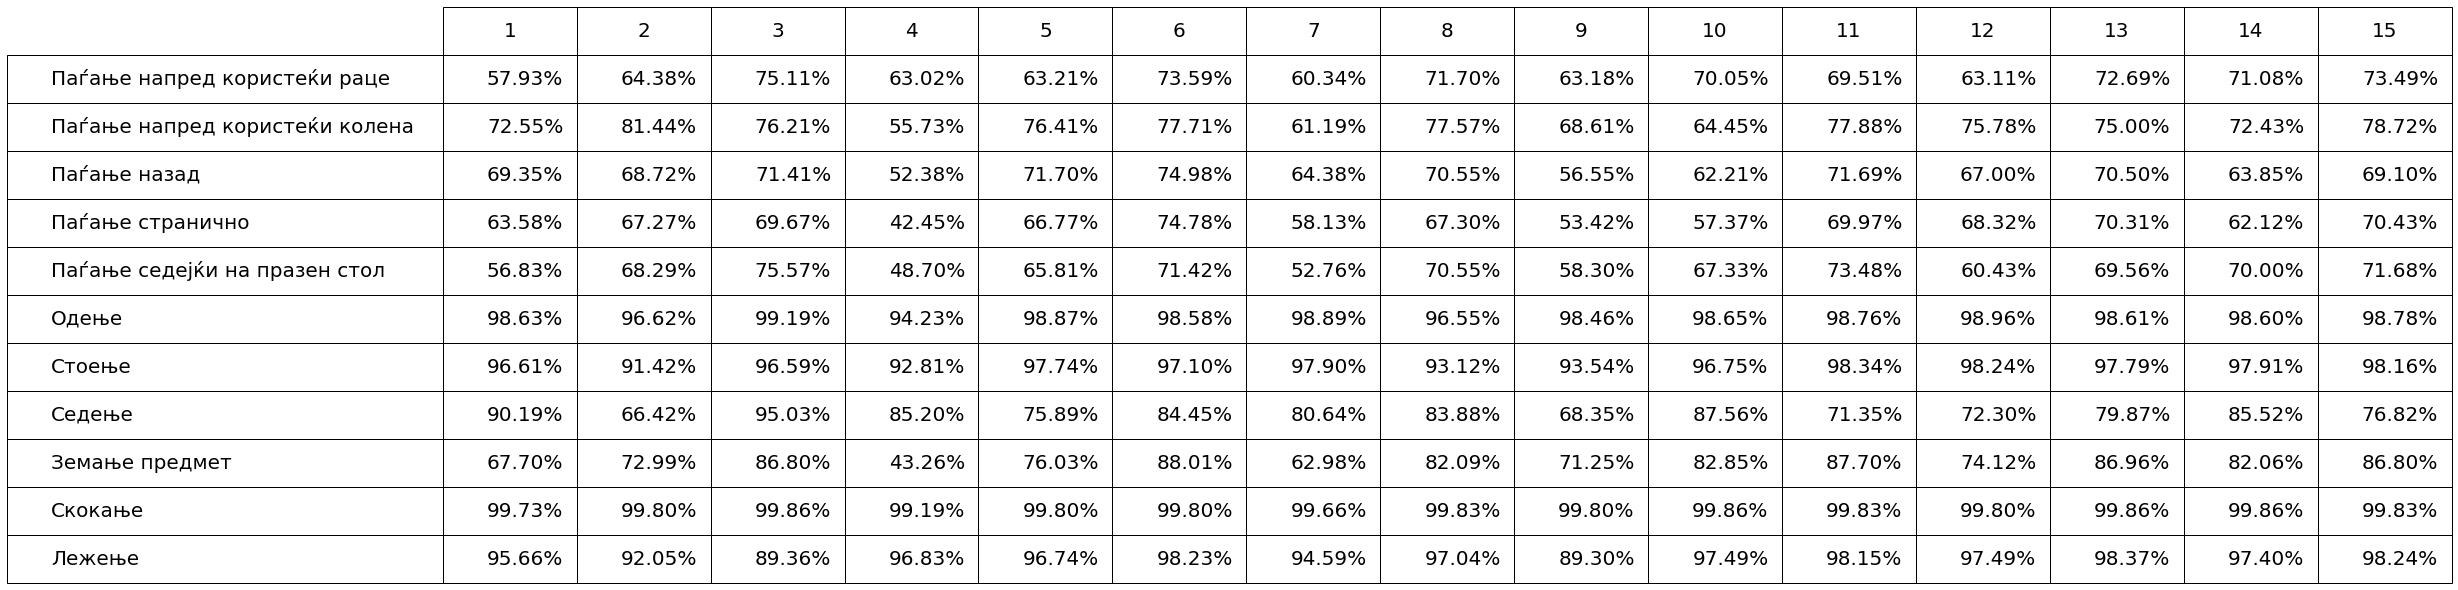

In [26]:
import matplotlib.pyplot as plt
from platform import python_version as pythonversion
from matplotlib import __version__ as matplotlibversion
%matplotlib inline
print('python: '+pythonversion())
print('matplotlib: '+matplotlibversion)

fig = plt.figure()
ax = fig.add_subplot(111)
y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1]    
col_labels1 = ['Глужд', 'Половина', 'Врат', 'Зглоб \n на рака', 'Глужд+ \n половина', 'Глужд+ \n врат', 'Глужд+ \n зглоб \n на рака', 'Половина+ \n Врат', 'Половина+ \n зглоб \n на рака', 'Врат+ \n зглоб \n на рака', 'Ankle+Belt+ \n Neck', 'Глужд+половина+ \n зглоб на рака', 'Глужд+врат+ \n зглоб на рака', 'Половина+врат+ \n зглоб на рака', 'Глужд+половина+ \nврат+зглоб \n на рака']
col_labels=list(range(1,16))
row_labels = ['Паѓање напред користеќи раце',
       'Паѓање напред користеќи колена',
       'Паѓање назад',
       'Паѓање странично',
       'Паѓање седејќи на празен стол',
       'Одење',
       'Стоење',
       'Седење',
       'Земање предмет',
       'Скокање',
       'Лежење']
table_vals = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]

# Draw table
the_table = plt.table(cellText=arr,
                      colWidths=[0.1] * 15,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
the_table.scale(4, 4)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.savefig('C:\\Users\\Korisnik\\Desktop\\diplomska\\Literatura\\ETAI\\matplotlib-table_macenonian.png', bbox_inches='tight', pad_inches=0.05)

In [19]:
arr=[]
for i in range(0,len(table[0])):
    p=[]
    for j in range(0,len(table)):
        p.append(str("{:.2f}".format(table[j][i]*100))+'%')
    arr.append(p)
        

In [17]:
print(table[0])

[]


In [12]:
arr_=[]
k=[1,2,3,4,5,6,7,8,9,10,11]
arr_.append(k)
for i in range(0,len(temp_arr)):
    p=[]
    for j in range(0,len(temp_arr[0])):
        p.append(str("{:.2f}".format(temp_arr[i][j]*100))+'%')
    arr_.append(p)
print(arr_)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['57.93%', '5.86%', '1.24%', '0.84%', '0.00%', '5.80%', '16.67%', '0.00%', '0.00%', '0.00%', '11.67%'], ['0.74%', '72.55%', '3.50%', '3.33%', '0.00%', '0.42%', '3.38%', '0.00%', '0.00%', '0.00%', '16.10%'], ['1.01%', '1.47%', '69.35%', '3.50%', '1.26%', '1.46%', '11.64%', '0.00%', '0.00%', '0.00%', '10.31%'], ['0.00%', '0.00%', '5.86%', '63.58%', '3.32%', '3.24%', '9.48%', '0.00%', '0.00%', '0.00%', '14.52%'], ['0.42%', '0.37%', '1.12%', '6.72%', '56.83%', '1.81%', '22.70%', '0.00%', '0.00%', '0.00%', '10.02%'], ['0.00%', '0.00%', '0.00%', '0.00%', '0.07%', '98.63%', '1.24%', '0.02%', '0.03%', '0.02%', '0.00%'], ['0.12%', '0.04%', '0.01%', '0.07%', '0.02%', '0.44%', '96.61%', '1.74%', '0.71%', '0.03%', '0.21%'], ['0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.02%', '5.70%', '90.19%', '0.00%', '0.00%', '4.10%'], ['0.00%', '0.00%', '0.00%', '0.00%', '0.49%', '1.19%', '22.94%', '5.13%', '67.70%', '1.80%', '0.76%'], ['0.00%', '0.00%', '0.00%', '0.00%'

python: 3.7.6
matplotlib: 3.1.3


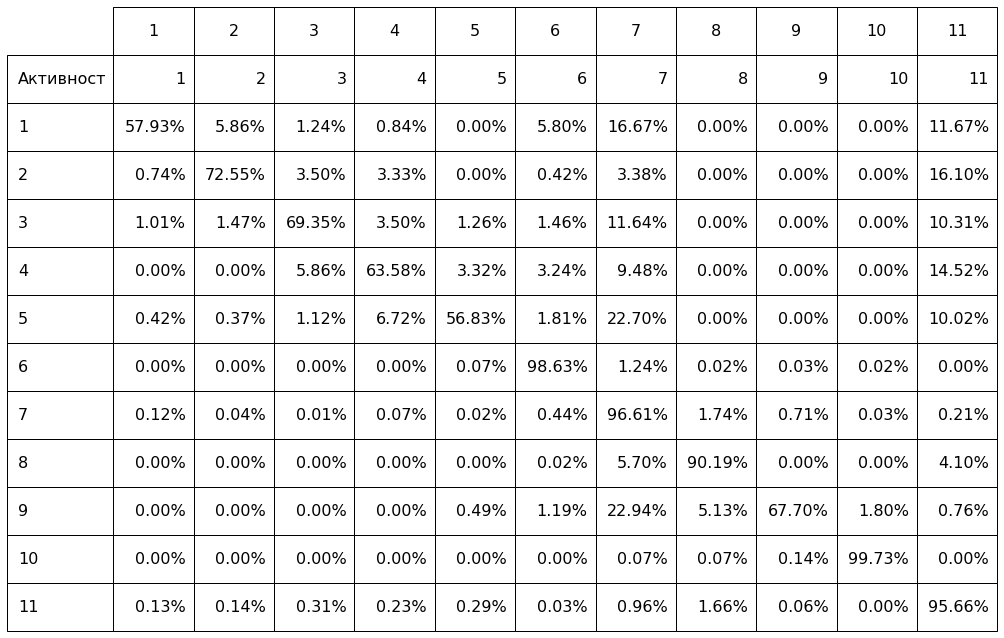

In [13]:
import matplotlib.pyplot as plt
from platform import python_version as pythonversion
from matplotlib import __version__ as matplotlibversion
%matplotlib inline
print('python: '+pythonversion())
print('matplotlib: '+matplotlibversion)

fig = plt.figure()
ax = fig.add_subplot(111)
y = [1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1]  
k=['Активност',1,2,3,4,5,6,7,8,9,10,11]
m=[1,2,3,4,5,6,7,8,9,10,11]
col_labels = ['Falling forward \n using hands',
       'Falling forward \n using knees',
       'Falling \n backwards',
       'Falling \n sidewards',
       'Falling sitting \n in empty chair',
       'Walking',
       'Standing',
       'Sitting',
       'Picking \n an object',
       'Jumping',
       'Laying']
row_labels = ['Falling forward \n using hands',
       'Falling forward \n using knees',
       'Falling backwards',
       'Falling sidewards',
       'Falling sitting \n in empty chair',
       'Walking',
       'Standing',
       'Sitting',
       'Picking \n an object',
       'Jumping',
       'Laying']
table_vals = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]

# Draw table
the_table = plt.table(cellText=arr_,
                      colWidths=[0.06] * 11,
                      rowLabels=k,
                      colLabels=m,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(16)
the_table.scale(4, 4)



# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.savefig('C:\\Users\\Korisnik\\Desktop\\diplomska\\Literatura\\ETAI\\mconfusionAnkle.png', bbox_inches='tight', pad_inches=0.05)

Merge cells

In [92]:
import matplotlib as mpl

def mergecells(table, ix0, ix1):
    ix0,ix1 = np.asarray(ix0), np.asarray(ix1)
    d = ix1 - ix0
    if not (0 in d and 1 in np.abs(d)):
        raise ValueError("ix0 and ix1 should be the indices of adjacent cells. ix0: %s, ix1: %s" % (ix0, ix1))

    if d[0]==-1:
        edges = ('BRL', 'TRL')
    elif d[0]==1:
        edges = ('TRL', 'BRL')
    elif d[1]==-1:
        edges = ('BTR', 'BTL')
    else:
        edges = ('BTL', 'BTR')

    # hide the merged edges
    for ix,e in zip((ix0, ix1), edges):
        table[ix[0], ix[1]].visible_edges = e

    txts = [table[ix[0], ix[1]].get_text() for ix in (ix0, ix1)]
    tpos = [np.array(t.get_position()) for t in txts]

    # center the text of the 0th cell between the two merged cells
    trans = (tpos[1] - tpos[0])/2
    if trans[0] > 0 and txts[0].get_ha() == 'right':
        # reduce the transform distance in order to center the text
        trans[0] /= 2
    elif trans[0] < 0 and txts[0].get_ha() == 'right':
        # increase the transform distance...
        trans[0] *= 2

    txts[0].set_transform(mpl.transforms.Affine2D().translate(*trans))

    # hide the text in the 1st cell
    txts[1].set_visible(False)